# **Project Name**    - Bike Sharing Demand Prediction



##### **Project Type**    - Regression
##### **Contribution**    - Individual/Team

# **Project Summary -**

This project aims to develop a regression model to accurately predict the demand for bike sharing services. By analyzing historical data and considering various factors, we seek to provide insights that can optimize bike availability, improve customer experience, and enhance operational efficiency.

The objective is to build a robust regression model that effectively predicts the number of bikes required based on key variables such as weather conditions, time of day, day of the week, and other relevant factors.

The project will follow the following methodology:

1. **Data reading**: Historical data on bike sharing services is taken as for training algorithms. Data includes weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall, etc.), the number of bikes rented per hour and date information.

2. **Data preprocessing**: The collected data will undergo thorough cleaning and preprocessing. Missing values and outliers will be handled appropriately, and feature engineering techniques will be employed to extract meaningful information that can enhance the model's performance.

3. **Model selection and training**: Various regression algorithms, such as linear regression along with L1 and L2 regularization, polynomial regression, decision trees and ensemble methods like Voting Ensemble, Random Forest, Adaboost, Gradient Boosting, XGBoost, etc. will be explored. These algorithms will be trained using the preprocessed data, and their performance will be evaluated using appropriate metrics, such as mean squared error (MSE) or root mean squared error (RMSE).

4. **Feature selection**: The project will identify the most influential features affecting bike demand. Through feature selection techniques, the most relevant variables will be chosen to refine the regression model and improve its accuracy.

5. **Model evaluation and refinement**: The trained regression model will undergo rigorous evaluation using cross-validation techniques. Fine-tuning of hyperparameters will be performed to improve the model's accuracy, robustness, and generalizability.

6. **Predictive analysis**: The final regression model, deemed the most accurate and reliable, will be deployed to make predictions on new or unseen data. This will provide real-time estimates of bike demand, facilitating effective resource planning and allocation.

Through this regression project on bike sharing demand prediction, we aim to leverage historical data and machine learning techniques to develop an accurate model that optimizes bike availability, improves customer experience, and enhances operational efficiency. The regression model developed in this project is expected to provide accurate predictions of bike demand. The project's outcomes will provide valuable insights for bike sharing service providers, ultimately benefiting both users and operators in the pursuit of a seamless and efficient bike sharing experience.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


**Business Context**

Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [273]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# for statistical tests
import scipy.stats as stats

# to ignore warnings
import warnings
warnings.filterwarnings("ignore")

# to display full set of column data
pd.pandas.set_option('display.max_columns',None)

### Dataset Loading

In [274]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [275]:
# Load Dataset
dataset=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Machine Learning/Capstone Project Regression/SeoulBikeData.csv', encoding = "ISO-8859-1")

### Dataset First View

In [276]:
# Dataset First Look
dataset.head()

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0  01/12/2017                254     0             -5.2           37   
1  01/12/2017                204     1             -5.5           38   
2  01/12/2017                173     2             -6.0           39   
3  01/12/2017                107     3             -6.2           40   
4  01/12/2017                 78     4             -6.0           36   

   Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0               2.2              2000                      -17.6   
1               0.8              2000                      -17.6   
2               1.0              2000                      -17.7   
3               0.9              2000                      -17.6   
4               2.3              2000                      -18.6   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons     Holiday  \
0                      0.0           0.0            0.0  Winter  No Holiday   
1                      0.0           0.0            0.0  Winter  No Holiday   
2                      0.0           0.0            0.0  Winter  No Holiday   
3                      0.0           0.0            0.0  Winter  No Holiday   
4                      0.0           0.0            0.0  Winter  No Holiday   

  Functioning Day  
0             Yes  
1             Yes  
2             Yes  
3             Yes  
4             Yes

### Dataset Rows & Columns count

In [277]:
# Dataset Rows & Columns count
print(f"Total Rows: {dataset.shape[0]}")
print(f"Total Rows: {dataset.shape[1]}")

Total Rows: 8760
Total Rows: 14


### Dataset Information

In [278]:
# Dataset Info
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

#### Duplicate Values

In [279]:
# Dataset Duplicate Value Count
dataset.duplicated().sum()

0

#### Missing Values/Null Values

In [280]:
# Missing Values/Null Values Count
dataset.isna().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

<Axes: >

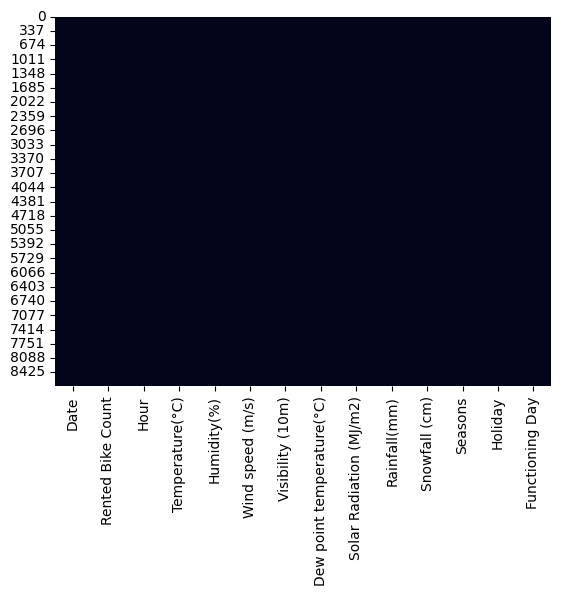

In [281]:
# Visualizing the missing values
sns.heatmap(dataset.isnull(), cbar=False)

### What did you know about your dataset?

* The dataset given is a historical bike sharing data and we have to analyse it and use it to for prediction of bike count required at each hour.

* Our objective is to find a way to estimate the value prediction of bike count required at each hour for the stable supply of rental bikes. If we can do so for the historical data, then we should able to estimate bike count required at each hour.

* The above dataset has 14 features with 8760 rows of data. There are no missing and duplicate values in the dataset.

* 'Rented Bike Count' is our dependent variable column and rest columns are our features.


## ***2. Understanding Your Variables***

In [282]:
# Dataset Columns
dataset.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [283]:
# Dataset Describe
dataset.describe(include='all')

Date  Rented Bike Count         Hour  Temperature(°C)  \
count         8760        8760.000000  8760.000000      8760.000000   
unique         365                NaN          NaN              NaN   
top     01/12/2017                NaN          NaN              NaN   
freq            24                NaN          NaN              NaN   
mean           NaN         704.602055    11.500000        12.882922   
std            NaN         644.997468     6.922582        11.944825   
min            NaN           0.000000     0.000000       -17.800000   
25%            NaN         191.000000     5.750000         3.500000   
50%            NaN         504.500000    11.500000        13.700000   
75%            NaN        1065.250000    17.250000        22.500000   
max            NaN        3556.000000    23.000000        39.400000   

        Humidity(%)  Wind speed (m/s)  Visibility (10m)  \
count   8760.000000       8760.000000       8760.000000   
unique          NaN               NaN               NaN   
top             NaN               NaN               NaN   
freq            NaN               NaN               NaN   
mean      58.226256          1.724909       1436.825799   
std       20.362413          1.036300        608.298712   
min        0.000000          0.000000         27.000000   
25%       42.000000          0.900000        940.000000   
50%       57.000000          1.500000       1698.000000   
75%       74.000000          2.300000       2000.000000   
max       98.000000          7.400000       2000.000000   

        Dew point temperature(°C)  Solar Radiation (MJ/m2)  Rainfall(mm)  \
count                 8760.000000              8760.000000   8760.000000   
unique                        NaN                      NaN           NaN   
top                           NaN                      NaN           NaN   
freq                          NaN                      NaN           NaN   
mean                     4.073813                 0.569111      0.148687   
std                     13.060369                 0.868746      1.128193   
min                    -30.600000                 0.000000      0.000000   
25%                     -4.700000                 0.000000      0.000000   
50%                      5.100000                 0.010000      0.000000   
75%                     14.800000                 0.930000      0.000000   
max                     27.200000                 3.520000     35.000000   

        Snowfall (cm) Seasons     Holiday Functioning Day  
count     8760.000000    8760        8760            8760  
unique            NaN       4           2               2  
top               NaN  Spring  No Holiday             Yes  
freq              NaN    2208        8328            8465  
mean         0.075068     NaN         NaN             NaN  
std          0.436746     NaN         NaN             NaN  
min          0.000000     NaN         NaN             NaN  
25%          0.000000     NaN         NaN             NaN  
50%          0.000000     NaN         NaN             NaN  
75%          0.000000     NaN         NaN             NaN  
max          8.800000     NaN         NaN             NaN

### Variables Description 

Data Description:

* ###### Date : year-month-day
* ###### Rented Bike count - Count of bikes rented at each hour
* ###### Hour - Hour of he day (0-23)
* ###### Temperature-Temperature in Celsius
* ###### Humidity - Humidity measure (%)
* ###### Windspeed - m/s
* ###### Visibility - Visibility Measure (10m)
* ###### Dew point temperature - Dew point temperature measure (Celsius)
* ###### Solar radiation - Solar radiation measure (MJ/m2)
* ###### Rainfall - Rainfall in mm
* ###### Snowfall - Snowfall measure (cm)
* ###### Seasons - Winter, Spring, Summer, Autumn
* ###### Holiday - Holiday/No holiday
* ###### Functional Day - Whether a functional day or not

### Check Unique Values for each variable.

In [284]:
# Check Unique Values for each variable.
dataset.nunique()

Date                          365
Rented Bike Count            2166
Hour                           24
Temperature(°C)               546
Humidity(%)                    90
Wind speed (m/s)               65
Visibility (10m)             1789
Dew point temperature(°C)     556
Solar Radiation (MJ/m2)       345
Rainfall(mm)                   61
Snowfall (cm)                  51
Seasons                         4
Holiday                         2
Functioning Day                 2
dtype: int64

Details about data:
* There are 4 categorical columns and 10 numerical columns. Columns 'Date', 'Seasons', 'Holiday' and 'Functioning Day' are of object data type.
* Columns 'Rented Bike Count', 'Hour', 'Humidity (%)' and 'Visibility (10m)' are of int64 numerical data type.
* Columns 'Temperature Temperature (℃)', 'Wind Speed (m/s)', 'Dew Point Temperature (℃)', 'Solar Radiation (MJ/2)', 'Rainfall (mm)' and 'Snowfall(cm) are of float64 numerical data type.
* Unique count : Seasons- 4 , Holiday- 2 , Functioning Day- 2
* The numerical columns appear to be outlier free based on dataset description.

## 3. ***Data Wrangling***

### Data Wrangling Code

In [285]:
# Creating a copy of dataset and assigning it to df
df=dataset.copy()

In [286]:
# Converting date column to datetime format
df['Date']=pd.to_datetime(df['Date'])

In [287]:
# Checking the years for which dataset is given
df['Date'].dt.year.value_counts()

2018    8016
2017     744
Name: Date, dtype: int64

In [288]:
df.head()

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0 2017-01-12                254     0             -5.2           37   
1 2017-01-12                204     1             -5.5           38   
2 2017-01-12                173     2             -6.0           39   
3 2017-01-12                107     3             -6.2           40   
4 2017-01-12                 78     4             -6.0           36   

   Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0               2.2              2000                      -17.6   
1               0.8              2000                      -17.6   
2               1.0              2000                      -17.7   
3               0.9              2000                      -17.6   
4               2.3              2000                      -18.6   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons     Holiday  \
0                      0.0           0.0            0.0  Winter  No Holiday   
1                      0.0           0.0            0.0  Winter  No Holiday   
2                      0.0           0.0            0.0  Winter  No Holiday   
3                      0.0           0.0            0.0  Winter  No Holiday   
4                      0.0           0.0            0.0  Winter  No Holiday   

  Functioning Day  
0             Yes  
1             Yes  
2             Yes  
3             Yes  
4             Yes

In [289]:
# Extracting month from Date
df['Month']=df['Date'].dt.month   

# Extracting week day name from Date
df['WeekDay']=df['Date'].dt.day_name()  

# Creating weekend or not column from Weekday
df['is_weekend']=np.where(df['WeekDay'].isin(['Sunday','Saturday']),1,0) 

# Droping Date and Weekday column
df=df.drop(columns=['Date','WeekDay'])  

df.head()

Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  Wind speed (m/s)  \
0                254     0             -5.2           37               2.2   
1                204     1             -5.5           38               0.8   
2                173     2             -6.0           39               1.0   
3                107     3             -6.2           40               0.9   
4                 78     4             -6.0           36               2.3   

   Visibility (10m)  Dew point temperature(°C)  Solar Radiation (MJ/m2)  \
0              2000                      -17.6                      0.0   
1              2000                      -17.6                      0.0   
2              2000                      -17.7                      0.0   
3              2000                      -17.6                      0.0   
4              2000                      -18.6                      0.0   

   Rainfall(mm)  Snowfall (cm) Seasons     Holiday Functioning Day  Month  \
0           0.0            0.0  Winter  No Holiday             Yes      1   
1           0.0            0.0  Winter  No Holiday             Yes      1   
2           0.0            0.0  Winter  No Holiday             Yes      1   
3           0.0            0.0  Winter  No Holiday             Yes      1   
4           0.0            0.0  Winter  No Holiday             Yes      1   

   is_weekend  
0           0  
1           0  
2           0  
3           0  
4           0

In [290]:
numerical_features=df.describe().columns.drop(['is_weekend','Rented Bike Count','Hour','Month'])
numerical_features

Index(['Temperature(°C)', 'Humidity(%)', 'Wind speed (m/s)',
       'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)'],
      dtype='object')

In [291]:
categorical_features = list(df.describe(include=['object','category']).columns)
categorical_features.extend(['is_weekend','Hour','Month'])
categorical_features

['Seasons', 'Holiday', 'Functioning Day', 'is_weekend', 'Hour', 'Month']

### What all manipulations have you done and insights you found?

* Firstly, 'Date' column was converted from 'object' datatype to 'datetime64[ns]'. Then, two new features namely 'Month' and 'is_weekend' were created by using data in 'Date' column.

* Inspection revealed that the data came from the years 2017 and 2018, however as 2017 contained only 744 data points, adding a year feature would not have been very helpful.

* Finally, 'Date' and 'Weekday' columns were dropped and two lists containing numerical and categorical feature names were created for better analysis.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart 1 - Dependent Variable Distribution (Univariate)

<function matplotlib.pyplot.show(close=None, block=None)>

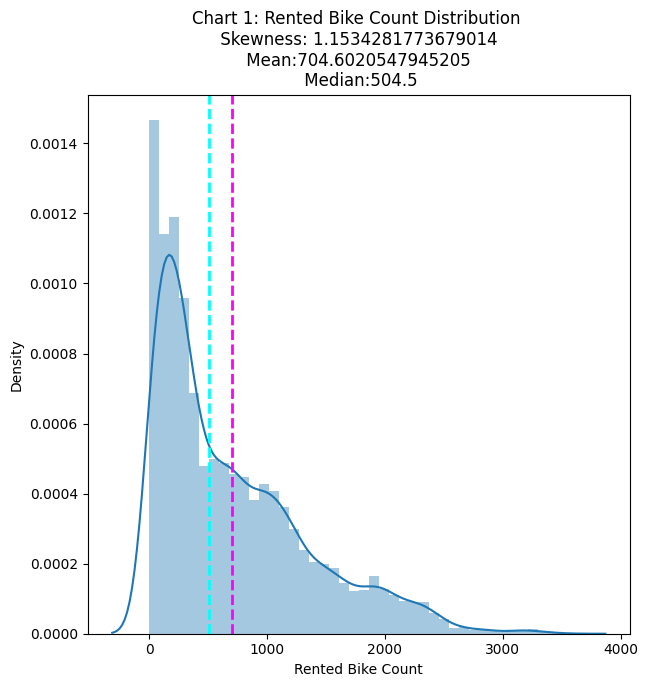

In [292]:
# Checking dependent variable distribution
plt.figure(figsize=(7,7))
ax=sns.distplot(df['Rented Bike Count'])
ax.axvline(df['Rented Bike Count'].mean(), color='magenta', linestyle='dashed', linewidth=2)
ax.axvline(df['Rented Bike Count'].median(), color='cyan', linestyle='dashed', linewidth=2)
ax.set_title(f"Chart 1: Rented Bike Count Distribution \n Skewness: {df['Rented Bike Count'].skew()} \n Mean:{df['Rented Bike Count'].mean()} \n Median:{df['Rented Bike Count'].median()}")
plt.show

##### 1. Why did you pick the specific chart?

* We used distplot from seaborn library here because we wanted to see the distribution of our dependent variable.

##### 2. What is/are the insight(s) found from the chart?

* The dependent variable is positively skewed with skewness value of +1.15, so for better performane of our linear models we might need to use function transformation.
* The average rented bikes per hour is 704 and the median is 504.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

* The positively skewed distribution of the number of rented bikes indicates that there are relatively few instances where a large number of bikes are rented, while most instances involve a smaller number of rentals. 
* This skewness suggests that there may be occasional periods of high demand for bikes, leading to a few spikes in rental activity. By finding features that are responsible for those high values from historical data future inventory needs can be forcast more accurately.
* This insight enables better planning for inventory replenishment and maintenance activities, ensuring that bikes are well-maintained and available during periods of high demand.
* As most of the customer value convenience and availability during peak demand periods. This information can be used to evaluate pricing strategies, such as implementing surge pricing during high-demand periods. By adjusting prices based on demand patterns, you can capture additional revenue during peak times while maintaining competitive pricing during periods of lower demand.

#### Charts 2 to 9 - Numerical Features Distribution (Univariate)

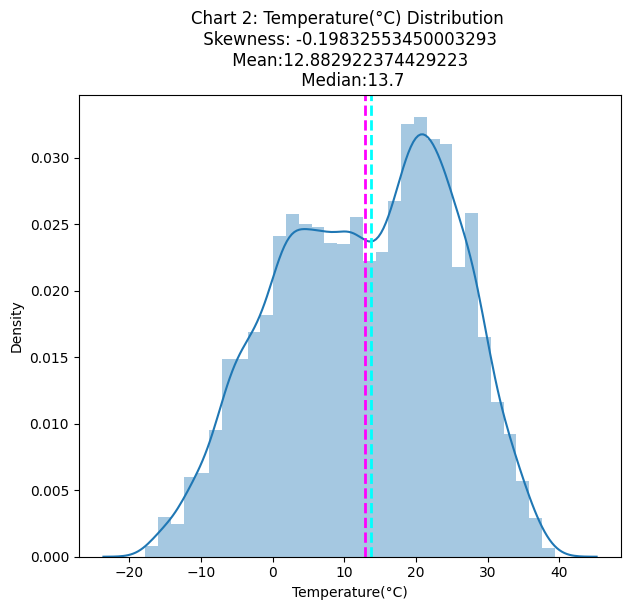

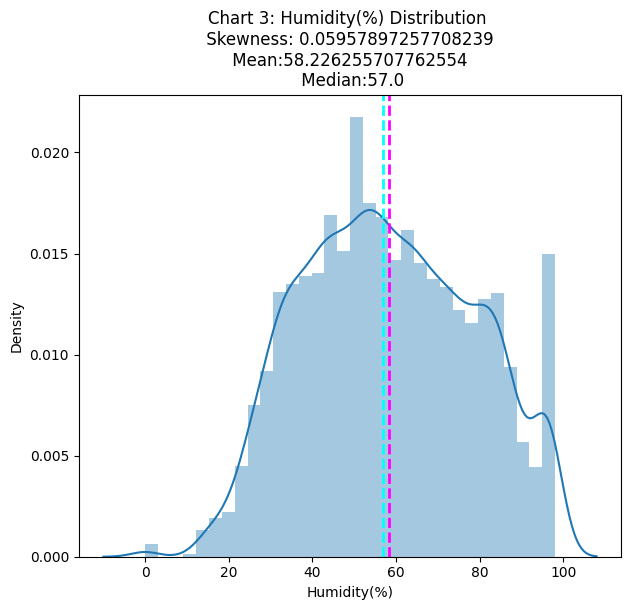

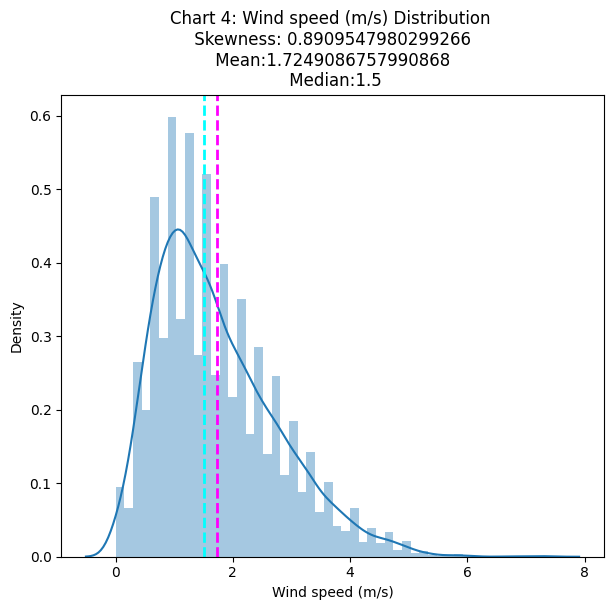

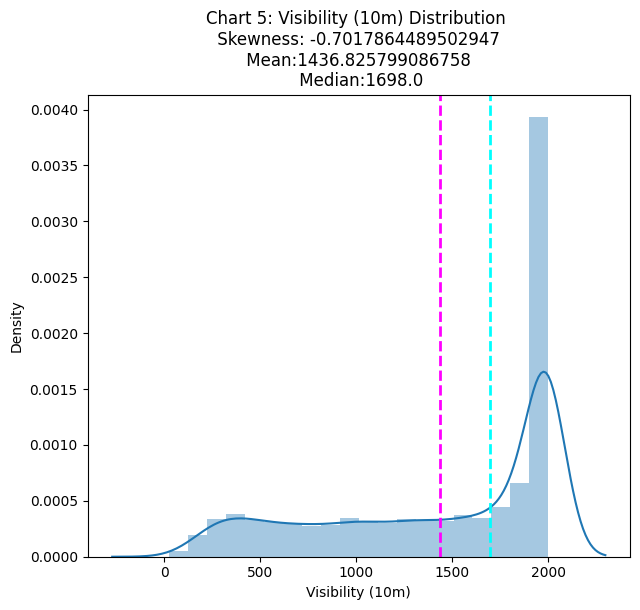

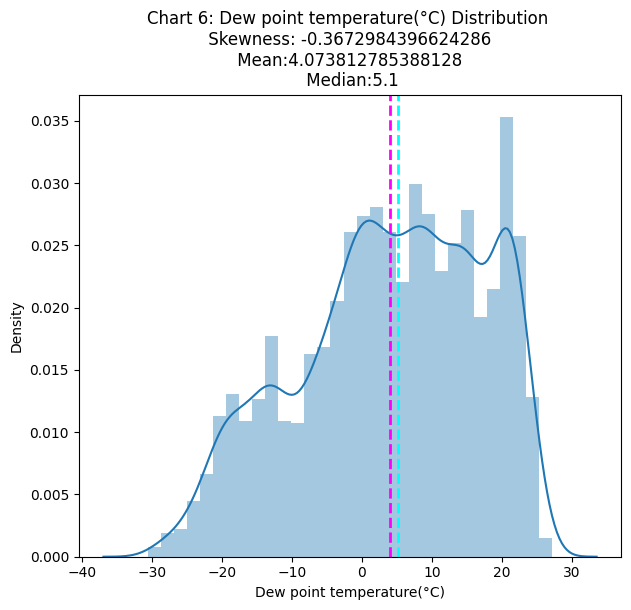

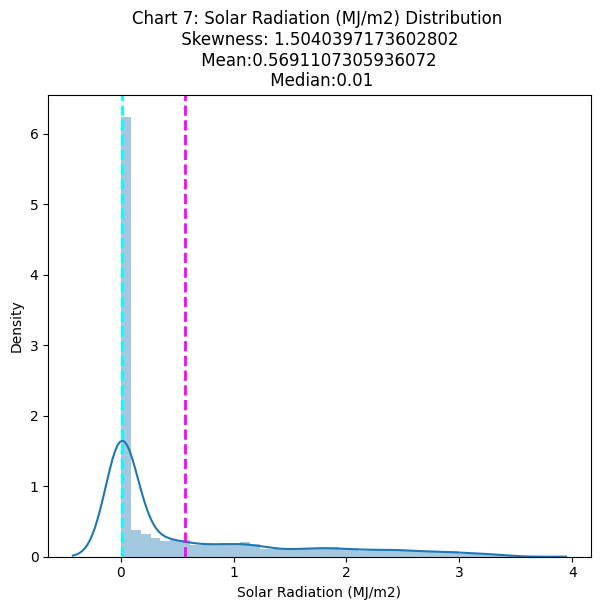

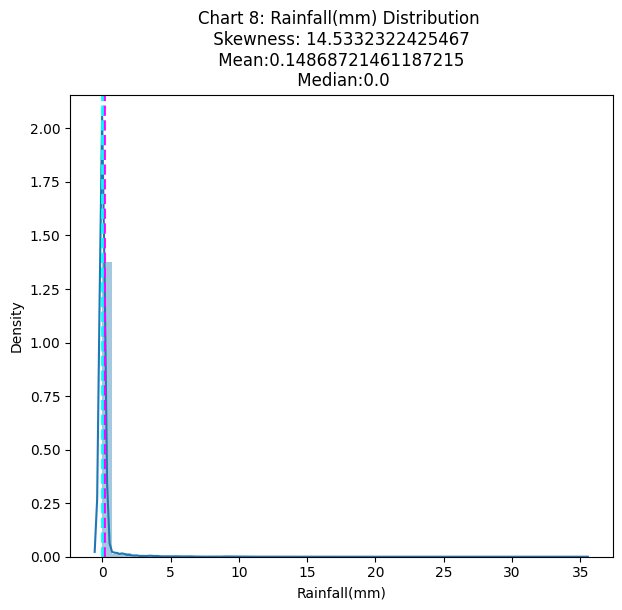

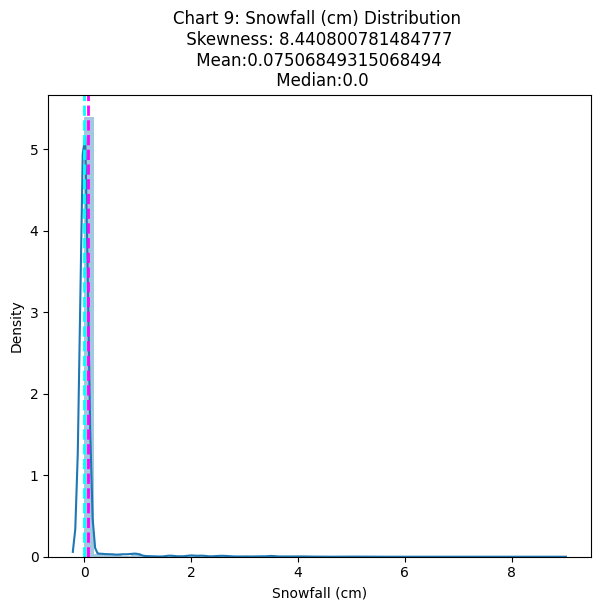

In [293]:
# Loop to plot distribution graphs of our numerical features
chart_num=2
for col in numerical_features:
  plt.figure(figsize=(7,6))
  ax=sns.distplot(df[col])
  ax.axvline(df[col].mean(), color='magenta', linestyle='dashed', linewidth=2)
  ax.axvline(df[col].median(), color='cyan', linestyle='dashed', linewidth=2)
  ax.set_title(f"Chart {chart_num}: {col} Distribution \n Skewness: {df[col].skew()} \n Mean:{df[col].mean()} \n Median:{df[col].median()}")
  chart_num+=1
plt.show()

In [294]:
df['Solar Radiation (MJ/m2)'].value_counts()

0.00    4300
0.01     128
0.02      82
0.03      69
0.06      61
        ... 
3.38       1
2.97       1
3.44       1
3.49       1
3.45       1
Name: Solar Radiation (MJ/m2), Length: 345, dtype: int64

In [295]:
df['Rainfall(mm)'].value_counts()

0.0     8232
0.5      116
1.0       66
1.5       56
0.1       46
        ... 
1.9        1
3.3        1
17.0       1
1.4        1
1.8        1
Name: Rainfall(mm), Length: 61, dtype: int64

In [296]:
df['Snowfall (cm)'].value_counts()

0.0    8317
0.3      42
1.0      39
0.9      34
0.5      34
0.7      31
0.8      22
2.0      22
0.4      21
1.6      19
2.2      18
0.2      15
0.6      15
3.5      14
2.6      12
2.5      10
1.2       8
2.7       6
1.8       5
3.0       5
4.0       4
4.1       4
3.2       4
1.3       4
3.7       3
3.3       3
1.1       3
3.8       3
2.3       3
2.1       3
1.9       3
1.7       3
2.4       3
3.4       2
8.8       2
2.8       2
2.9       2
0.1       2
5.0       2
4.8       2
1.4       2
3.9       2
4.3       2
5.1       1
1.5       1
3.1       1
7.1       1
7.0       1
6.0       1
3.6       1
4.2       1
Name: Snowfall (cm), dtype: int64

##### 1. Why did you pick the specific chart?

* Distplots from sns library has been used here again to see the distribution of numerical features.

##### 2. What is/are the insight(s) found from the chart?

* The feature 'Temperature' and 'Humidity' follow close to normal distributions.
* The feature 'Wind Speed' and 'Dew Point Temperature' are slightly positive and negative skewed respectively.
* The features 'Visibility', 'Solar Radiation', 'Rainfall' and 'Snowfall' are highly skewed variables.
* The high positive skewness in 'Solar Radiation', 'Rainfall' and 'Snowfall' are justified as most of the time there values are very very low almost 0, and these values increase occasionaly.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.


* The gained insights from the distributions of these variables can help create a positive business impact. 
* Understanding the normal distributions of 'Temperature' and 'Humidity' enables businesses to make informed decisions related to resource allocation and customer comfort. 
* However, if poorly managed, highly skewed variables like "Visibility," "Solar Radiation," "Rainfall," and "Snowfall" might result in poor growth. Neglecting low visibility situations could have an effect on consumer satisfaction and safety. Inadequate planning for strong sun radiation, heavy rain, or snowfall can cause operations to be disrupted, infrastructure to be damaged, and customers to become disgruntled. 
* Maintaining positive growth and client loyalty requires mitigating these risks through backup plans, safety precautions, and operational changes.

#### Chart 10 to 15 - Categorical Features Distribution (Univariate)

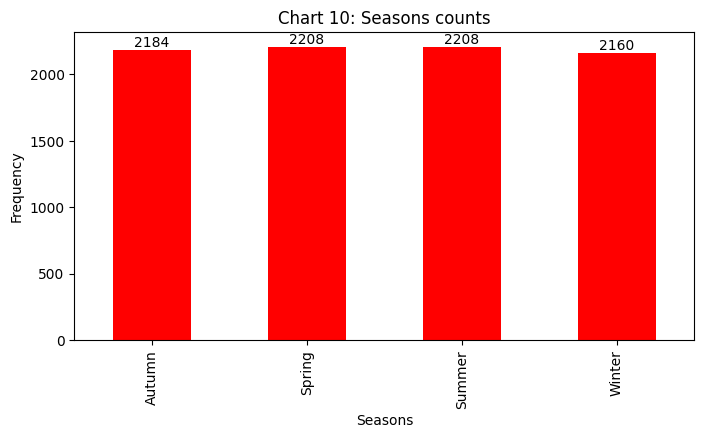

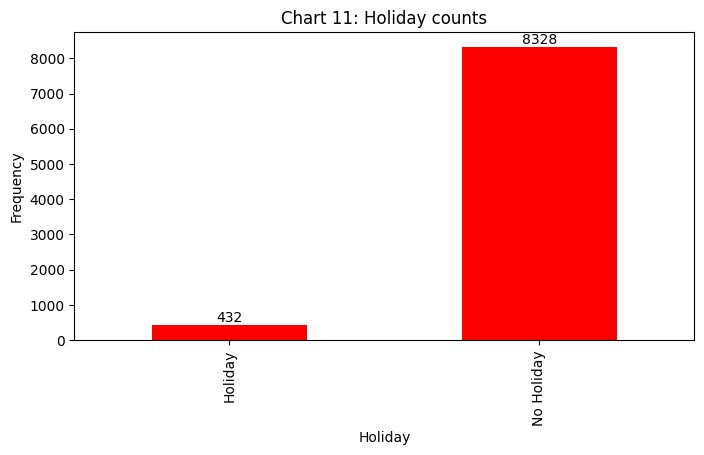

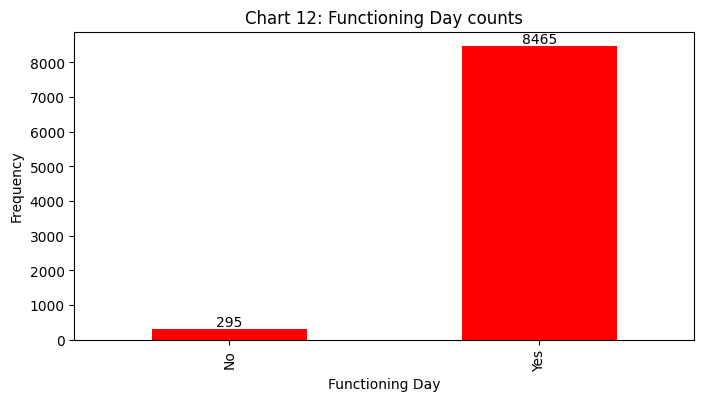

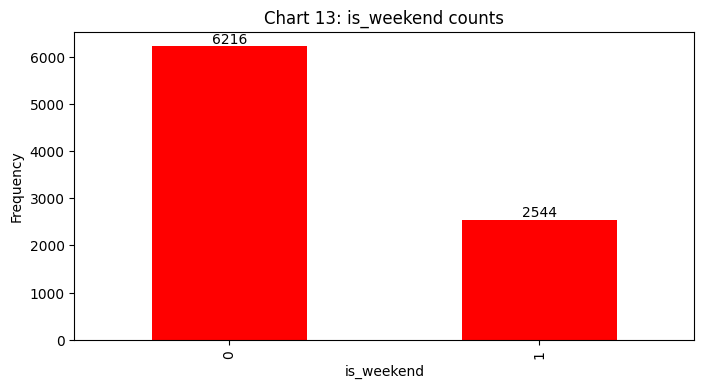

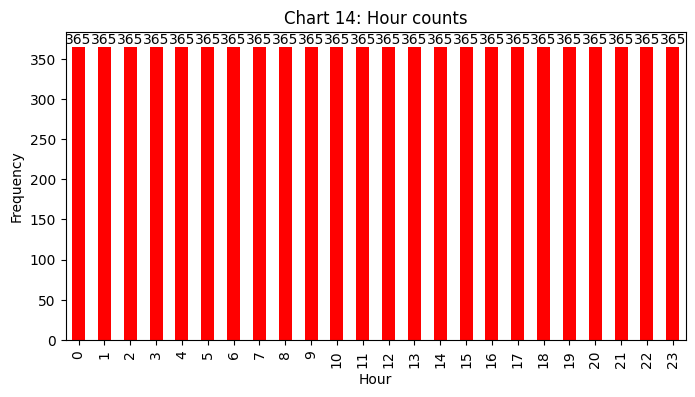

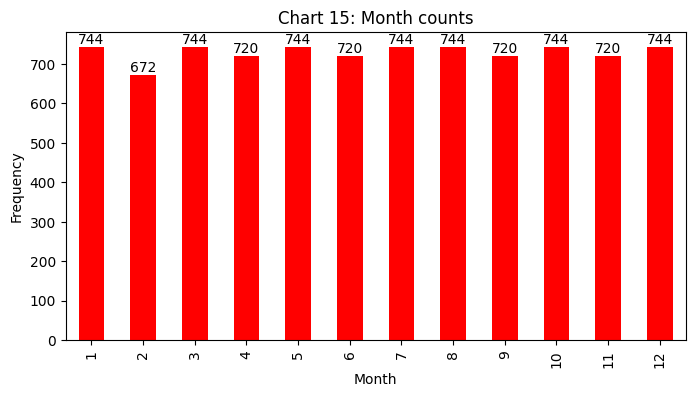

In [297]:
# plot a bar plot for each categorical feature count  
Chart_num=10
for col in categorical_features:
    counts = df[col].value_counts().sort_index()
    fig = plt.figure(figsize=(8, 4))
    ax = fig.gca()
    counts.plot.bar(ax = ax, color='red')
    ax.set_title(f'Chart {Chart_num}: {col} counts')
    ax.set_xlabel(col) 
    ax.set_ylabel("Frequency")
    for container in ax.containers:
      ax.bar_label(container)
    Chart_num+=1
plt.show()

##### 1. Why did you pick the specific chart?

* Simple bar plot is used here to visualize value_counts of different categorical features.

##### 2. What is/are the insight(s) found from the chart?

* The month, hour and season features have balanced data points for each their sub-categories.
* Most of the data is from days which are functioning days and when there are no holidays.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

* When analysed in relation to the number of rented bikes, these features can assist businesses in forecasting, optimising, and making defensible choices regarding resource allocation and client comfort. For instance, developing better pricing strategies depending on the busiest times of day or on the weekdays or weekends can have a significant positive impact on business.

#### Chart 16 to 23 - Multivariate Analysis b/w Dependent Variable and numerical features

In [298]:
# Checking correlation of Dependent Variable with different features
df.corr()['Rented Bike Count']

Rented Bike Count            1.000000
Hour                         0.410257
Temperature(°C)              0.538558
Humidity(%)                 -0.199780
Wind speed (m/s)             0.121108
Visibility (10m)             0.199280
Dew point temperature(°C)    0.379788
Solar Radiation (MJ/m2)      0.261837
Rainfall(mm)                -0.123074
Snowfall (cm)               -0.141804
Month                        0.070861
is_weekend                  -0.032259
Name: Rented Bike Count, dtype: float64

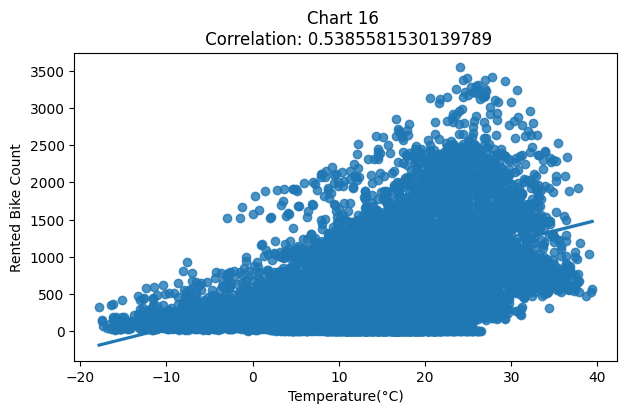

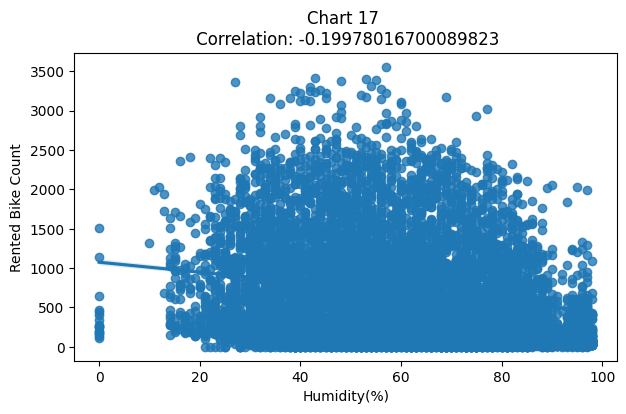

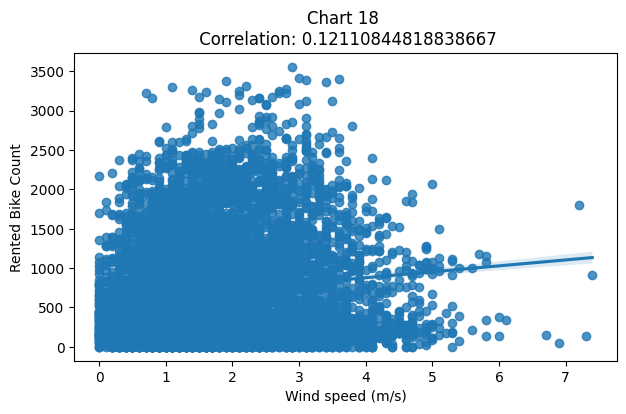

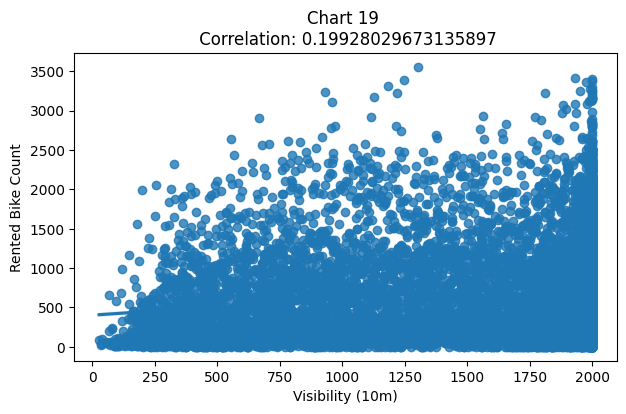

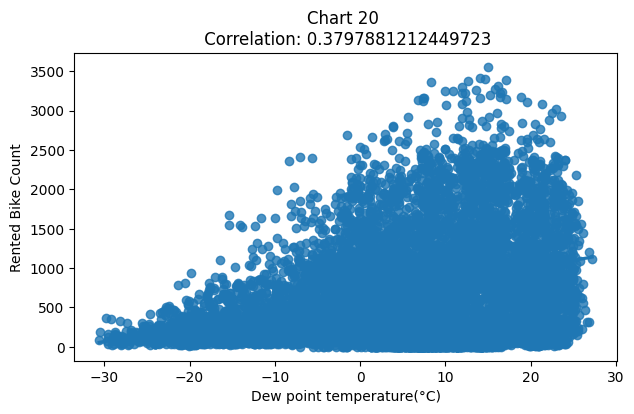

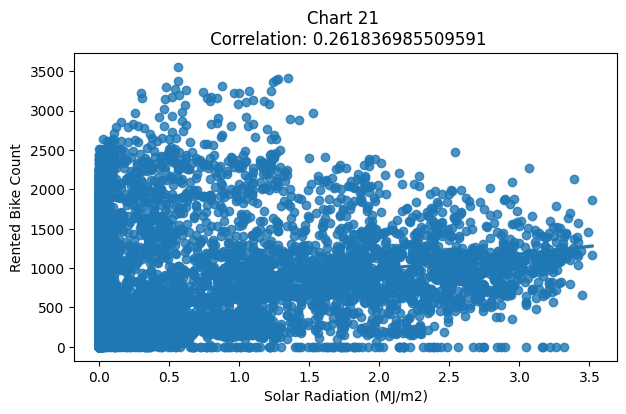

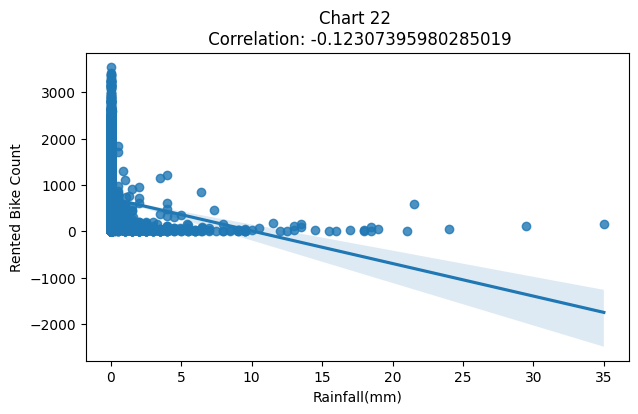

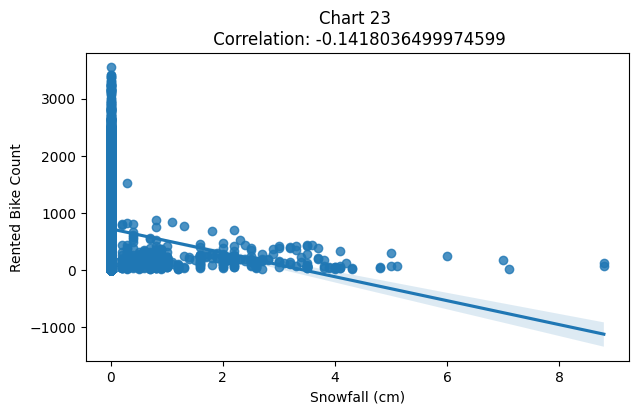

In [299]:
# plotting regression plot
chart_num=16
for col in numerical_features:
  plt.figure(figsize=(7,4))
  sns.regplot(x=df[col],y=df['Rented Bike Count'])
  plt.title(f"Chart {chart_num} \n Correlation: {df['Rented Bike Count'].corr(df[col])}")
  plt.xlabel(col)
  plt.ylabel('Rented Bike Count')
  plt.show()
  chart_num+=1

##### 1. Why did you pick the specific chart?

Regplot from seaborn library has been used here to visualize how these numerical features are correlated with Bike Rental Count.

##### 2. What is/are the insight(s) found from the chart?

* Bike Rental count is positively correlated with Temperature with correlation value of 0.5385 and there are several possible reasons why temperature might be highly correlated with bike rental count one of them might be that temperature is often closely linked to the seasons. People tend to engage in outdoor activities, including bike riding, more frequently during warmer seasons such as spring and summer. As temperatures rise, individuals are more inclined to enjoy outdoor recreational activities, leading to an increased demand for bike rentals.

* Bike Rental count is slight negatively correlated with Humidity. One explanation for this can be that those who are not acclimated to or prefer drier climes may feel generally uneasy due to humidity. The decision to rent a bike may be influenced by this feeling of discomfort, which could explain the slight negative correlation.

* Wind speed and visibility are both very little positively correlated with Bike Rental Count which is justified as moderate wind speed and good visibility are ideal conditions for outdoor activities such as, biking.

* Solar Radiation and Dew Point Temperature are also slight positively correlated with Bike Rental Count.

* Finally, snowfall and rainfall are negatively correlated with Bike Rental Count which is self-evident.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

* The gained insights regarding the correlations between weather variables and bike rental count can help create a positive business impact. Understanding that bike rental count is positively correlated with temperature, wind speed, visibility, solar radiation, and dew point temperature allows businesses to tailor their operations and marketing efforts to maximize revenue during peak demand periods and promote biking as an enjoyable outdoor activity.

* However, there are challenges to consider. The slight negative correlation between humidity and bike rental count suggests that high humidity levels may discourage rentals. Additionally, bike rental businesses may experience reduced demand during periods of significant snowfall or heavy rain. Overcoming these challenges may require adapting services or offering alternative activities during inclement weather.

* Overall, by leveraging these insights, bike rental companies can capitalize on favorable weather conditions and mitigate challenges, ultimately driving positive growth and customer satisfaction.

#### Chart 24 to 35 - Multivariate Analysis b/w Dependent Variable and categorical features

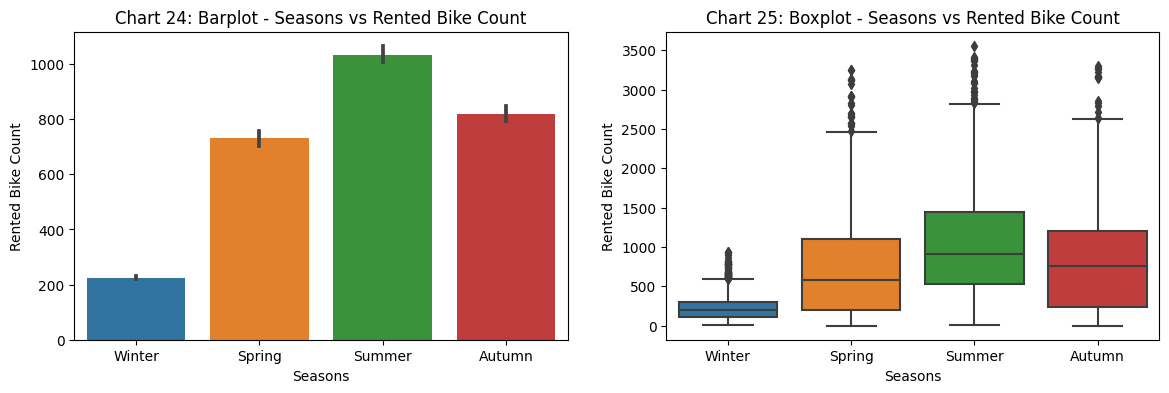

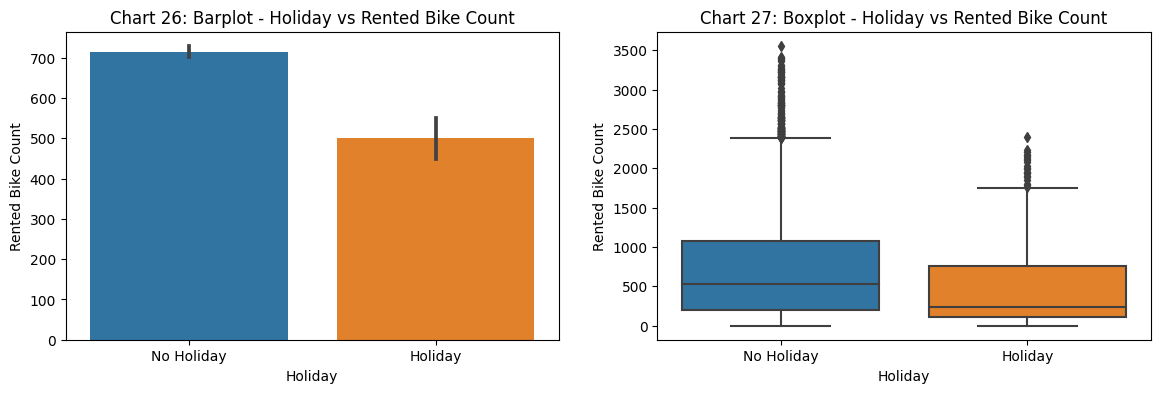

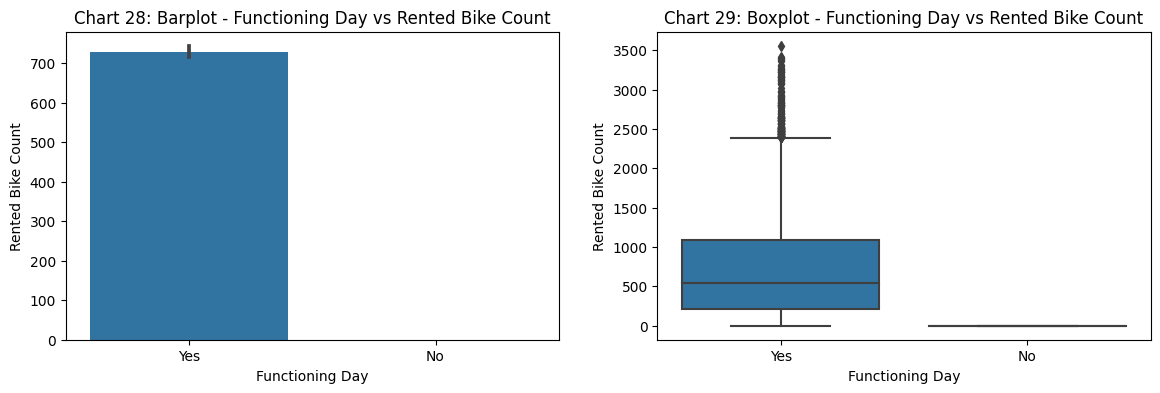

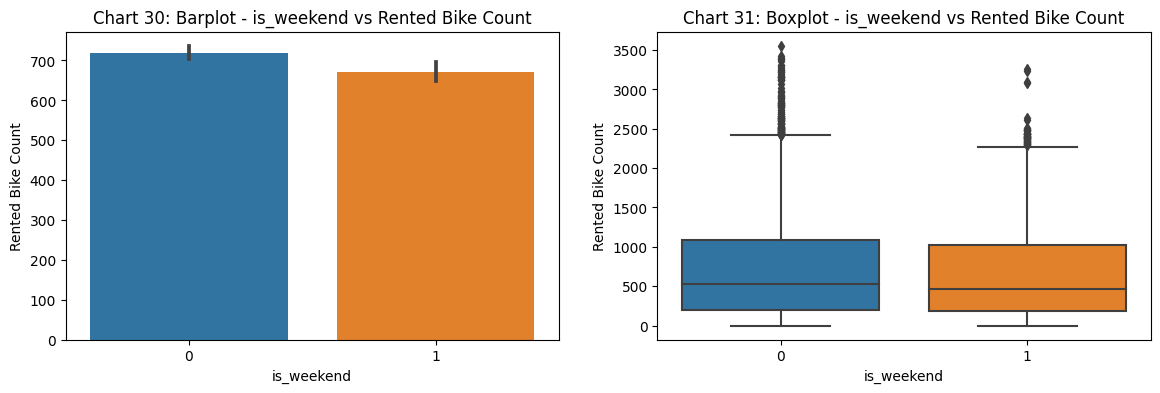

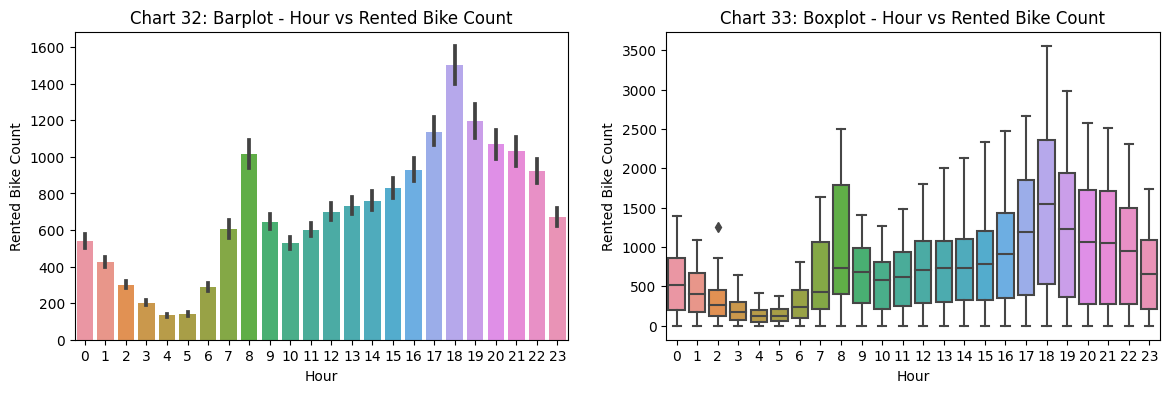

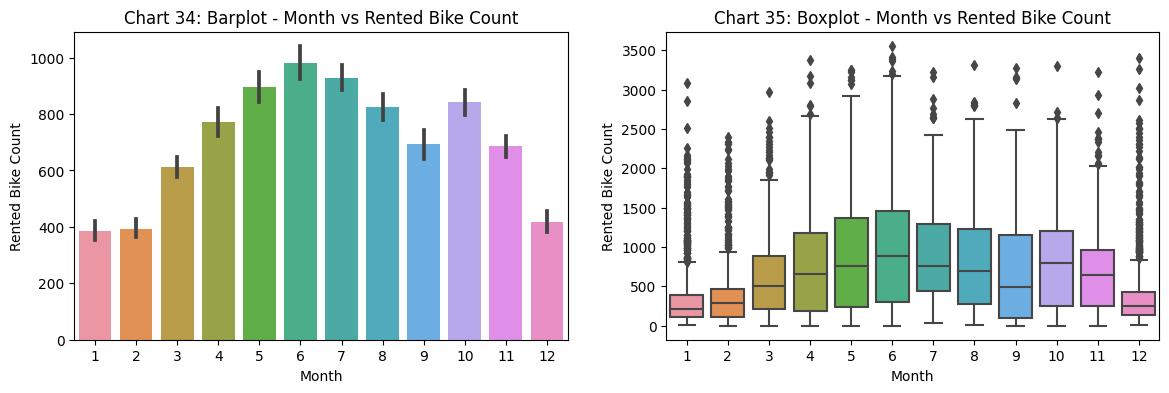

In [300]:
# plotting barplot and boxplot between Dependent Variable and categorical features
Chart_num=24
for col in categorical_features:
  plt.figure(figsize=(14,4))
  plt.subplot(121)
  sns.barplot(x=df[col],y=df['Rented Bike Count'])
  plt.title(f'Chart {Chart_num}: Barplot - {col} vs Rented Bike Count')

  Chart_num+=1
  plt.subplot(122)
  sns.boxplot(x=df[col],y=df['Rented Bike Count'])
  plt.title(f'Chart {Chart_num}: Boxplot - {col} vs Rented Bike Count')
  Chart_num+=1

  plt.show()

In [301]:
df.groupby('Functioning Day')['Rented Bike Count'].sum()

Functioning Day
No           0
Yes    6172314
Name: Rented Bike Count, dtype: int64

In [302]:
# Removing non functional day rows as bike rentals were 0
df=df.drop(df[df['Functioning Day'] == 'No'].index) 

In [303]:
# Droping Functioning Day Column
df=df.drop(['Functioning Day'], axis = 1)
categorical_features.remove('Functioning Day')

In [304]:
df.groupby('is_weekend')['Rented Bike Count'].mean()

is_weekend
0    740.794157
1    700.438345
Name: Rented Bike Count, dtype: float64

In [305]:
df2=dataset.copy()

In [306]:
df2['Date']=pd.to_datetime(df2['Date'])
df2['WeekDay']=df2['Date'].dt.day_name()

<Axes: xlabel='WeekDay', ylabel='Rented Bike Count'>

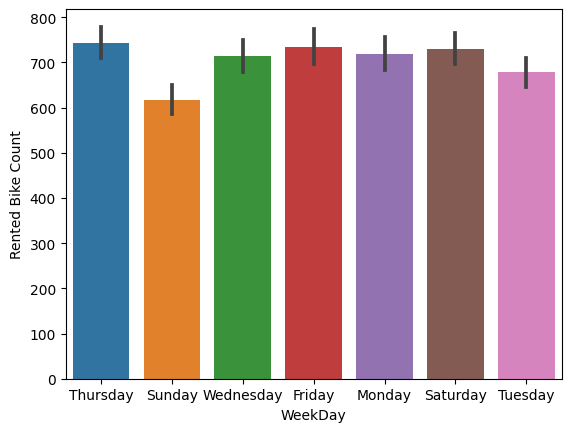

In [307]:
# Week Days comparison with rented bike count
sns.barplot(x=df2['WeekDay'],y=df2['Rented Bike Count'])

##### 1. Why did you pick the specific chart?

* Barplots and Boxplots have been used here to visualize how the rented bikes vary based on different sub-categories of our categorical features.

##### 2. What is/are the insight(s) found from the chart?

* In chart no. 24, 25 (*Seasons vs Rented Bike Count*) and 34, 35 (*Months vs Rented Bike Count*) we can see that rented bike counts are highest during summer months, followed by autumn, spring and winter respectively, which can be attributed to favorable weather conditions, increased leisure time, tourism, seasonal events, and the limitations imposed by winter weather.

* Rented bike counts are slightly more on non holiday days as compared to holidays one possible reason for this could be that holidays often involve travel and vacations, with people leaving their local area or city for leisure or family visits. This can result in a decrease in the number of people available to rent bikes in the local area during holidays.

* As per charts 28, 29 and also by further investigation, it was found that rental bikes were only given on Functioning Days, so we removed non-functioning days and then removed functioning day column also.

* Rented bikes are almost same if not slightly lower on weekends especially on Sundays as compared to weekdays.

* Rented bikes counts are high during peak hours.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

* These gained insights can indeed help create a positive business impact for bike rental companies. Understanding the patterns and preferences of customers allows businesses to optimize their operations, such as adjusting inventory levels, staffing, and marketing efforts, to meet the demand during peak periods. By aligning their resources with customer preferences, businesses can enhance customer satisfaction and increase revenue.

* However, the insight that rented bikes are slightly lower on weekends compared to weekdays could be a potential challenge. Bike rental companies should carefully analyze the reasons behind this trend and consider strategies to attract more customers on weekends, such as offering special promotions, organizing weekend-specific events, or targeting different customer segments.

* Overall, by leveraging these insights and addressing potential challenges, bike rental companies can make informed decisions to create a positive business impact and maximize their growth potential.

#### Chart 36 - Correlation Heatmap

<Axes: >

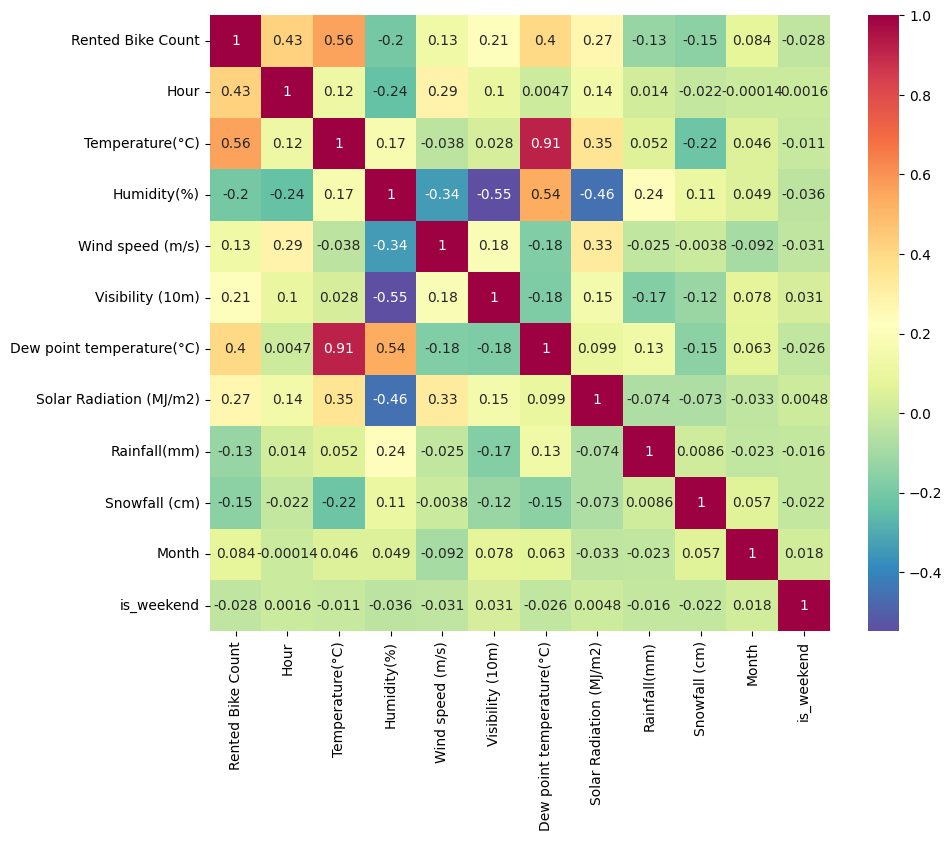

In [308]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True,cmap='Spectral_r')

##### 1. Why did you pick the specific chart?

* A table displaying correlation coefficients between variables is called a correlation matrix. The correlation between two variables is displayed in each cell of the table. Data are summarised using correlation matrices, which are also used as inputs for more sophisticated studies and as diagnostics for such analyses. The correlation's range is [-1,1].

* Therefore a correlation heatmap is used here to determine the correlation between all the variables as well as the correlation coefficients.

##### 2. What is/are the insight(s) found from the chart?

* There is very high positive corelation between Temperature and Due Point Temperature.
* Humidity is negatively correlated with many variables like Solar Radiation, Visibility, Wind Speed.
* Dependent variable Rented Bike Count is positively correlated with features Temperature and Hour.
* Rest all correlation can be depicted from the above chart.

#### Chart 37 - Pair Plot 

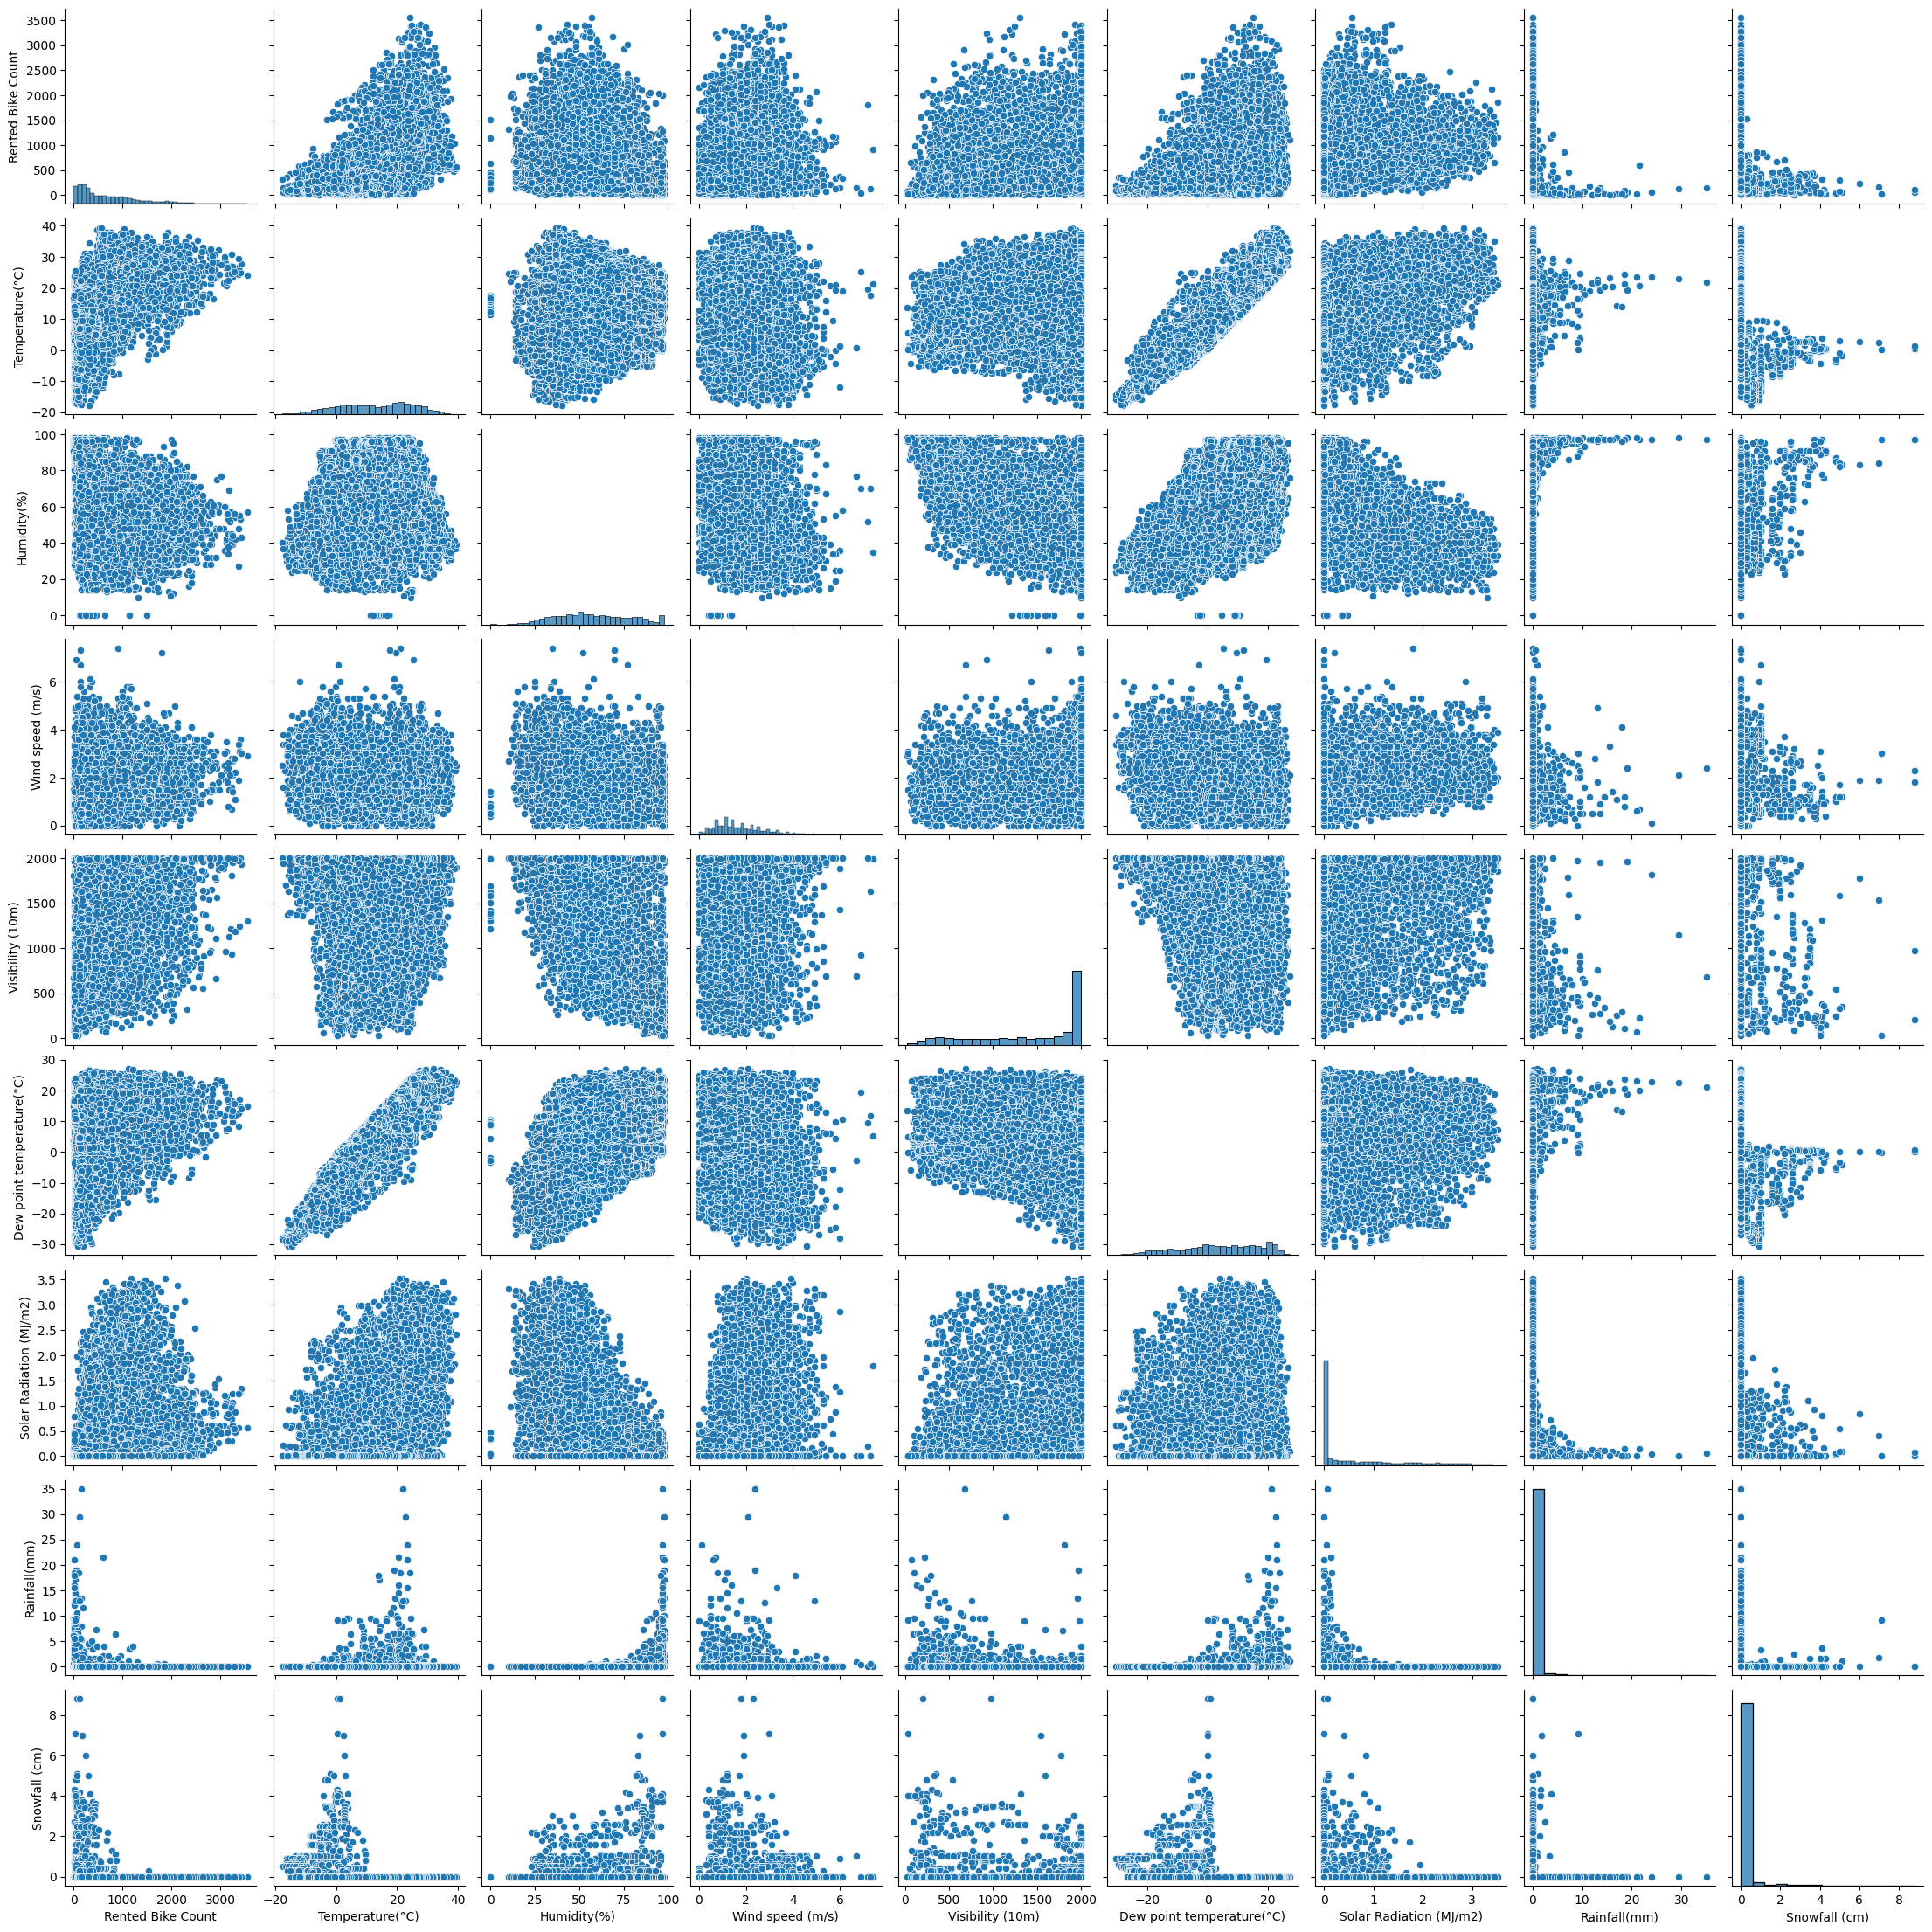

In [309]:
sns.pairplot(df.drop(categorical_features,axis=1))

##### 1. Why did you pick the specific chart?

Pair plot is used here to analyse the patterns of data and realationship between the features. It's exactly same as the correlation map but here you will get the graphical representation.

##### 2. What is/are the insight(s) found from the chart?

From the above chart it can be seen, there are less linear relationship between variables and data points aren't linearly separable so linear regression algorithms might not work well here.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Hypothesis 1: The demand for bike sharing services is positively correlated with temperature as warmer weather conditions are expected to increase the demand for bike rentals, while higher levels of rainfall are likely to decrease the demand.

Hypothesis 2: The demand for bike sharing services varies significantly across different seasons.

Hypothesis 3: The distribution of bike rental demand follows a normal distribution

In [310]:
# Function to give conclusion about the P - Value
def conclusion(p):
  significance_level = 0.05
  if p>significance_level:
    return f"Failed to reject the Null Hypothesis for p = {p}."
  else:
    return f"Null Hypothesis rejected Successfully for p = {p}"

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

* Test Type: Pearson correlation test

* Null Hypothesis: r(Pearson correlation coefficient) = 0

* Alternate Hypothesis : r > 0



#### 2. Perform an appropriate statistical test.

In [318]:
# Perform Statistical Test to obtain P-Value

corr_coeff, p_value = stats.pearsonr(df['Rented Bike Count'], df['Temperature(°C)'])

# Print the chi-square statistic and p-value
print("corr_coeff:", corr_coeff)
print("P-value:", p_value)
print(conclusion(p_value))

corr_coeff: 0.5627401718632261
P-value: 0.0
Null Hypothesis rejected Successfully for p = 0.0


In [312]:
corr_coeff

0.5627401718632261

*  P value of 0.0 indicates a statistically significant correlation with corr_coeff=0.5385581530139791.

##### Which statistical test have you done to obtain P-Value?

* I have done Pearson correlation test here to test my hypothesis.

##### Why did you choose the specific statistical test?

* I picked the pearson correlation test here to test whether there is a correlation between Bike Rental Count and Temperature because it is a widely used statistical method to measure the strength and direction of the linear relationship between two continuous variables.


### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

* Test: Chi-square test of independence.
* Null hypothesis (H0): There is no association between the demand for bike rentals and the season (e.g., spring, summer, fall, winter).
* Alternative hypothesis (Ha): There is an association between the demand for bike rentals and the season.

#### 2. Perform an appropriate statistical test.

In [313]:
df['Seasons'].value_counts()

Summer    2208
Winter    2160
Spring    2160
Autumn    1937
Name: Seasons, dtype: int64

In [314]:
df.shape

(8465, 14)

In [320]:
# Perform Statistical Test to obtain P-Value

spring_demand = df[df['Seasons']=='Spring']['Rented Bike Count'].tolist()  # Bike rental demand in spring
summer_demand = df[df['Seasons']=='Winter']['Rented Bike Count'].tolist()  # Bike rental demand in summer
fall_demand = df[df['Seasons']=='Spring']['Rented Bike Count'].tolist()  # Bike rental demand in fall
winter_demand = df[df['Seasons']=='Spring']['Rented Bike Count'].tolist()  # Bike rental demand in winter

# Perform chi-square test of independence
observed = np.array([spring_demand, summer_demand, fall_demand, winter_demand])
chi2, p_value, _, _ = stats.chi2_contingency(observed)

# Print the chi-square statistic and p-value
print("Chi-square statistic:", chi2)
print("P-value:", p_value)
print(conclusion(p_value))

Chi-square statistic: 527726.9154626721
P-value: 0.0
Null Hypothesis rejected Successfully for p = 0.0


* Null Hypothesis was rejected Successfully which means there is an association between the demand for bike rentals and the season.

##### Which statistical test have you done to obtain P-Value?

* Chi-square test of independence

##### Why did you choose the specific statistical test?

* I have choosen Chi-square test of independence of variables in a contingency table as it computes the chi-square statistic and p-value for the hypothesis test of independence of the observed frequencies in the contingency table observed.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

* Test: Z-test for normality.
* Null hypothesis (H0): The distribution of bike rental demand follows a normal distribution.
* Alternative hypothesis (Ha): The distribution of bike rental demand does not follow a normal distribution.

#### 2. Perform an appropriate statistical test.

In [322]:
# Perform Statistical Test to obtain P-Value

demand = df['Rented Bike Count'].tolist()  # Bike rental demand

# Perform z-test for normality
z_statistic, p_value = stats.normaltest(demand)

# Print the z-statistic and p-value
print("Z-statistic:", z_statistic)
print("P-value:", p_value)
print(conclusion(p_value))

Z-statistic: 1339.8474060639514
P-value: 1.1371885467443365e-291
Null Hypothesis rejected Successfully for p = 1.1371885467443365e-291


* Null Hypothesis rejected Successfully which means the distribution of bike rental demand does not follow a normal distribution

##### Which statistical test have you done to obtain P-Value?

Z-test for normality

##### Why did you choose the specific statistical test?

* I chose the Z-test for normality to test Hypothesis 3 (The distribution of bike rental demand follows a normal distribution) because it specifically focuses on assessing the normality of a distribution. 

* The Z-test for normality is a statistical test used to determine whether a given dataset follows a normal distribution. It is based on comparing the sample data to the expected values under a normal distribution assumption.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation

#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

### 2. Handling Outliers

In [ ]:
# Handling Outliers & Outlier treatments

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding

In [ ]:
# Encode your categorical columns

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Textual Data Preprocessing 
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [ ]:
# Expand Contraction

#### 2. Lower Casing

In [ ]:
# Lower Casing

#### 3. Removing Punctuations

In [ ]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [ ]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [ ]:
# Remove Stopwords

In [ ]:
# Remove White spaces

#### 6. Rephrase Text

In [ ]:
# Rephrase Text

#### 7. Tokenization

In [ ]:
# Tokenization

#### 8. Text Normalization

In [ ]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [ ]:
# POS Taging

#### 10. Text Vectorization

In [ ]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features

#### 2. Feature Selection

In [ ]:
# Select your features wisely to avoid overfitting

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [ ]:
# Transform Your data

### 6. Data Scaling

In [ ]:
# Scaling your data

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [ ]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.

##### What data splitting ratio have you used and why? 

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [ ]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

In [ ]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [ ]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***